In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
a = pd.Series(np.random.randn(5))

In [3]:
a

0    0.694110
1   -0.779143
2    0.606110
3    0.289241
4   -0.007891
dtype: float64

In [4]:
df = pd.DataFrame(a,columns=[0])

In [5]:
for i in range(1,4):
    df[i]=df[i-1]*df[0]

In [6]:
df

,0,1,2,3
0,0.694110,0.481788,3.344140e-01,2.321200e-01
1,-0.779143,0.607064,-4.729902e-01,3.685272e-01
2,0.606110,0.367369,2.226660e-01,1.349600e-01
3,0.289241,0.083660,2.419801e-02,6.999058e-03
4,-0.007891,0.000062,-4.913257e-07,3.876971e-09


In [7]:
df.ix[0:3,1:2]

/Users/Prueba/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


,1,2
0,0.481788,0.334414
1,0.607064,-0.472990
2,0.367369,0.222666
3,0.083660,0.024198


# TEMPERATURAS DE PAISES

In [8]:
datos = pd.read_csv('GlobalLandTemperaturesByCountry.csv')

In [9]:
datos.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [10]:
datos.shape
datos['AverageTemperature'].describe()

count    544811.000000
mean         17.193354
std          10.953966
min         -37.658000
25%          10.025000
50%          20.901000
75%          25.814000
max          38.842000
Name: AverageTemperature, dtype: float64

In [11]:
datos['Country']
grupos = datos.ix[:,['dt', 'AverageTemperature']].groupby(datos['Country'])

/Users/Prueba/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


In [12]:
a= (np.where(datos["Country"].values== "Colombia"))
a = a[0]

In [13]:
grupos.describe().tail()

AverageTemperature                                         \
                            count       mean       std     min       25%   
Country                                                                    
Western Sahara             2536.0  22.319818  4.022152  13.504  19.08750   
Yemen                      1649.0  26.253597  3.788625  18.928  22.73600   
Zambia                     1690.0  21.282956  2.373674  15.523  19.52675   
Zimbabwe                   1725.0  21.117547  3.097284  14.079  18.35300   
Åland                      3166.0   5.291383  7.168692 -12.870  -0.45425   

                                           
                    50%       75%     max  
Country                                    
Western Sahara  22.3070  25.96975  30.092  
Yemen           26.6430  29.75000  32.737  
Zambia          21.9695  22.93475  26.282  
Zimbabwe        22.2840  23.54700  26.601  
Åland            4.5705  11.79650  19.973

In [14]:
PAISES = []
DATOS = []
for name, group in grupos:
    DATOS.append(group)
    PAISES.append(name)

In [15]:
from random import randint
colors = []

for i in range(11):
    colors.append('#%06X' % randint(0, 0xFFFFFF))
print(colors)

['#EACD6A', '#ED512E', '#CE4A7B', '#AD4BF4', '#B5E1F5', '#60A6DD', '#A9C2FB', '#27D0D6', '#C3C95A', '#5BF04B', '#5A1CD2']


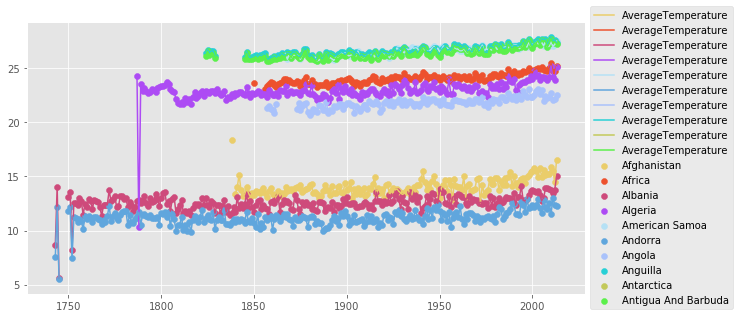

In [17]:
time = []
group = []

i = 0 
while i < 10:
    time.append(pd.DatetimeIndex(DATOS[i]['dt']))
    group.append(DATOS[i]['AverageTemperature'].groupby([time[i].year]).mean())
    i = i+1
g=0
#f, ax = plt.subplots(len(group), sharex=True, sharey=True)
plt.figure(figsize=(10,5))
while g < len(group):    
    x =group[g].index
    y=group[g]
    plt.scatter(x,y, color = colors[g], label=PAISES[g])
    plt.plot(y, color = colors[g])
    g=g+1
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# CAMBIO DE TEMPERATURA EN COLOMBIA

In [19]:
col = datos.loc[a,:]

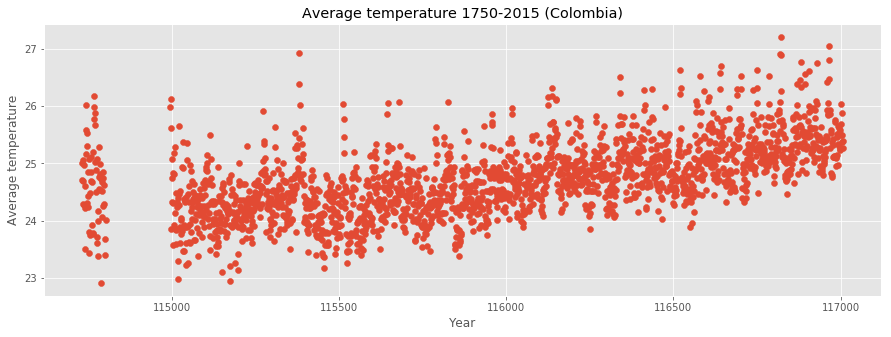

In [20]:
plt.figure(figsize=(15,5))
plt.scatter(col.index,col['AverageTemperature'])
plt.title('Average temperature 1750-2015 (Colombia)')
plt.xlabel("Year")
plt.ylabel("Average temperature")
plt.show()

In [21]:
time = pd.DatetimeIndex(col['dt'])
group = col.groupby([time.year]).mean()

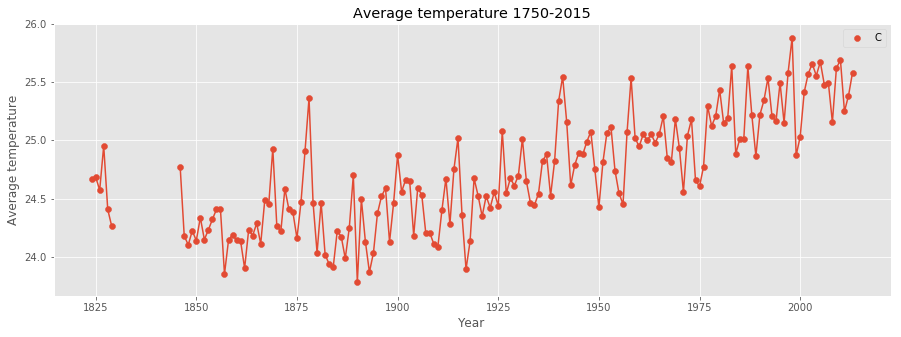

In [22]:
plt.figure(figsize=(15,5))
plt.scatter(group.index,group['AverageTemperature'])
plt.legend('Colombia')
plt.plot(group['AverageTemperature'])
plt.title('Average temperature 1750-2015')
plt.xlabel("Year")
plt.ylabel("Average temperature")
plt.show()

In [18]:
group['AverageTemperature']

AttributeError: 'list' object has no attribute 'i'